#  Water Pouring Problem

In this problem, you have a faucet with two cylinders of different sizes. The cylinders are unmarked (you can't determine partial measurements). The goal is to establish a sequence of pours to fill one of the cylinders with a certain amount of water. For example, if one cylinder is 9oz and the second 4oz with the goal of filling the first cylinder with 5oz of water. The sequence of pours would be: pour 9oz in the first cylinder; fill the second cylinder all the way (4oz), leaving 5oz of water.

The allowed pouring actions are:
* One glass to another
* From faucet to either glass
* From glass to the drain

This amounts to six possible actions.

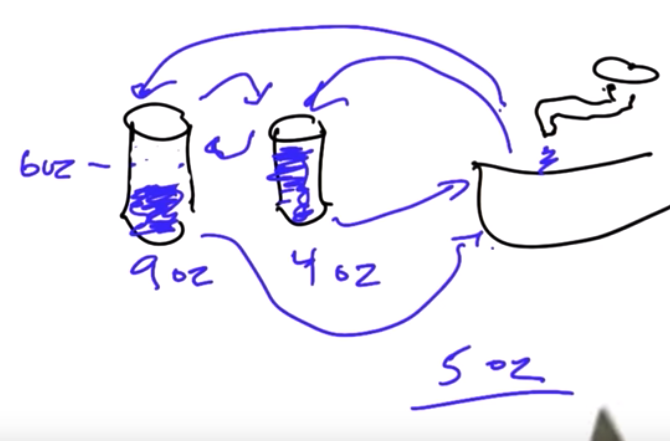

As usual, we next gather our concept inventory:
* Glasses: capacity and current level
* Collection of glasses: the pair of glasses and their current levels amount to the state of the world (everthing we need to know about where we are in the problem).
* Goal
* Pouring actions: 6 possible actions with three varieties--emptying, filling, transferring
* Solution: sequence of steps to reach our goal

Transferring is tricky. If we're pouring from X to Y, you can pour X into Y until Y is full, or until X is empty.

**The goal of this lesson is to find solutions to problems comprised of sequences of steps.**

And as always, we're trying to manage complexity in this course. The complexity of this problem comes from problems with long sequences.

## Combinatorial Complexity

As in the Cryptoarithmetic and Zebra problems, the water pouring problem faces combinatorial complexity. In the case of Cryptoarithmetic, we had `10!` complexity; for the Zebra problem, we had `5!**5` complexity. We have the same issue here, but the difference is that we can't put a quantitative number on the complexity.

This is a different type of combinatorial problem than the previous ones. In the previous ones, we had a fixed number of variables and knew the number of combinations for each variable. For the Water Pouring problem, we don't have static variables. Instead, we're putting together a sequence of actions to go from one state to the next. There are a number of actions that form the sequence to go from one state to the next, and at each intermediate step, there are branches to go down alternative paths. We know it's roughly `6**x`, but we don't know what `x` is.

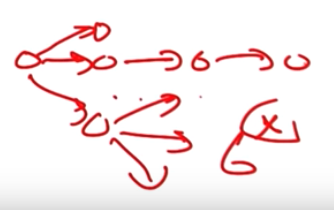

This type of problem is formally called a **combinatorial optimization** problem, or less formally, a **search** problem.


## Exploring the Space

It's called **search**, but **exploration** is actually a better name for these types of problems. We start at our "home" with both glasses empty (0oz and 0oz). We then explore by going to adjacent states, such as (0, 4). 

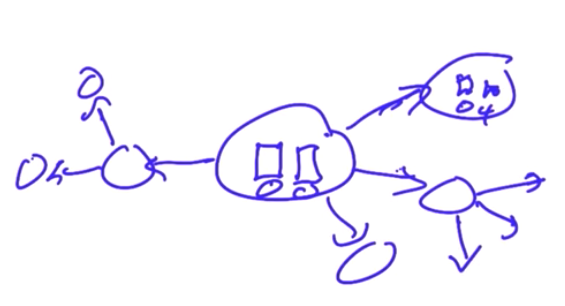

Somewhere out in this space is our goal state, which has (6, ?). But it's actually a collection of end goals, as long as the left glass has 6oz.

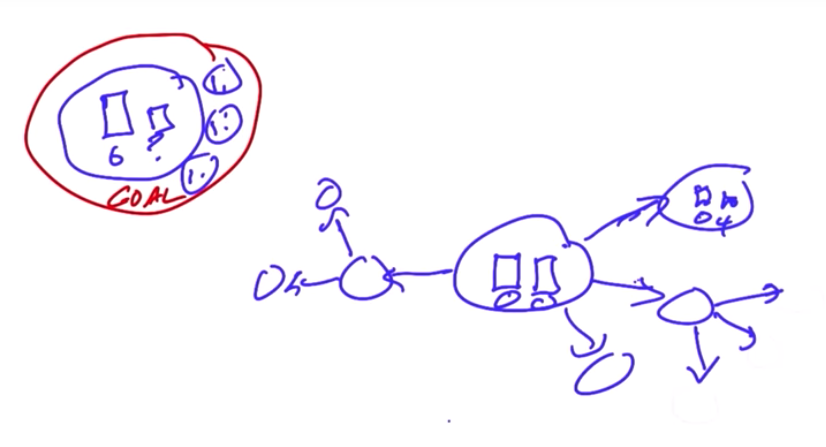

When doing exploration problems, it is useful to distinguish the **frontier** (outlined in green below) of the space you've explored. The frontier is the furthest outward you've explored so far. To make further progress towards the goal, you typically have to step from one of the frontier nodes further out.


The benefit of being a computer is that we can explore multiple paths on the frontier, and don't have to go back if we go down a bad path. It is like a group of explorers going down different pathways, collectively expanding the frontier.

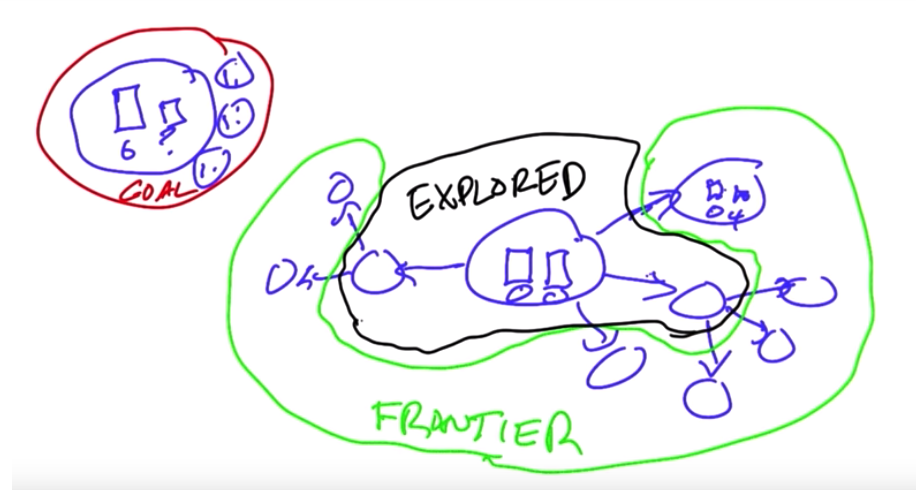

Our next move can be to take one of these explorers, and see the paths the lead to, since there's 6 possible actions. These can be states outside our current frontier, but they can be states already on the frontier, or even regress backwards to states that we've already explored.

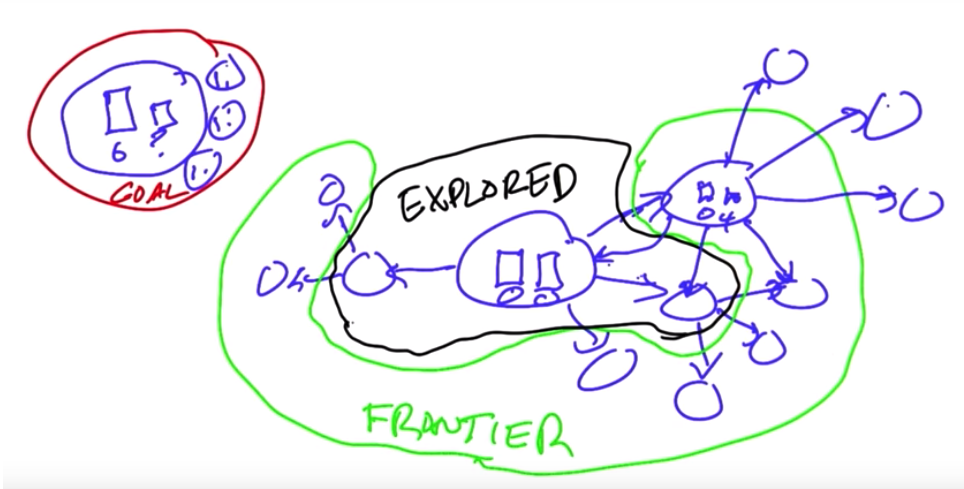

The goal is to continually expand the frontier until it overlaps our goal and we have a solution.

In exploration problems like this, there's two problems we have to worry about:

1. There's no solution at all: there's no path from the start state to the goal state. We can do the exploration and then report back that it's impossible.

2. If there is a path to the goal state, we want to make sure we can get there in a reasonable amount of time. We need to be efficient on how we explore the space. We also don't want to get stuck in an infinite loop.

If we're not clever with our approach, we may miss the solution, even though there is a path from the state to the end state.

## Strategy for Exploration

Our strategy is always concerned with "What path should we explore next?" To avoid going into an infinite loop (shown in red below), we have some possibilities:

* Don't reverse the action you just took.
* Always take the shortest path first.
* Don't reexplore. If we're on the frontier, we should not go back to already explored space.


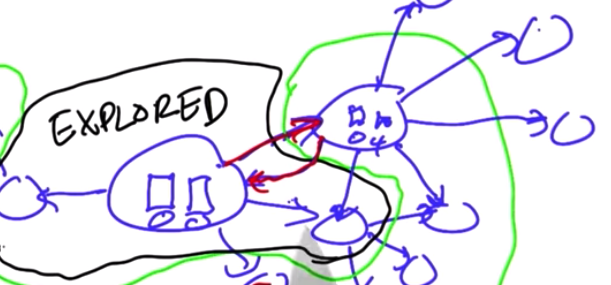

Of these possibilities, taking the shortest path first works because if there is a path, it will eventually find it. It may waste some time repeating itself and may not be the most efficient. Don't re-explore also works, and seems more efficient because it doesn't go down some of these paths. However, don't reverse isn't good enough. We could find ourself in a longer, infinite loop (shown below).

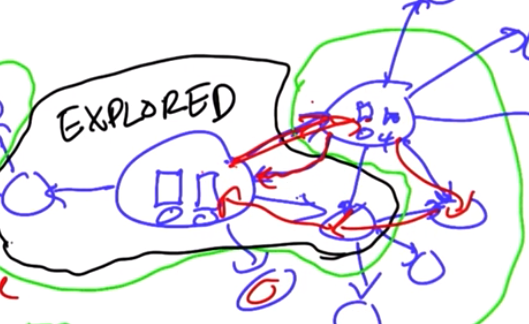

One final piece of terminology before we code up the solution to this problem. If we're at a particular state, the states we can get to by expanding the path are called its **successors**. Formally, they are the collection of states you can reach and the steps that it took to get there.


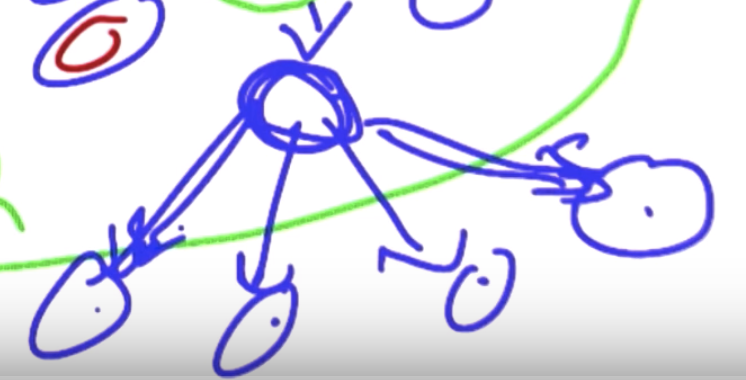


## Solving the Pour Problem

Let's break down the solution to this problem. Here's the overall solution:

```
def pour_problem(X, Y, goal, start=(0,0)):
    """
    X and Y are the capacity of glasses; (x, y) is current fill levels and
    represents a state. The goal is a level that can be in either glass. Start
    at start state and follow successors until we reach the goal. Keep track of
    frontier and previously explored; fail when no frontier.
    """
    if goal in start:
        return [start]
    explored = set() # set of states we have visited
    frontier = [ [start] ] # ordered list of paths we have blazed
    while frontier:
        path = frontier.pop(0)
        (x, y) = path[-1] # Last state in the first path of the frontier
        for (state, action) in successors(x, y, X, Y):
            if state not in explored:
                explored.add(state)
                path2 = path + [action, state]
                if goal in state:
                    return path2
                else:
                    frontier.append(path2)
    return Fail

Fail = []
```

The first part is to check whether we're done before we even start. Are we seeking a goal that's the same as our start state?

```
if goal in start:
    return [start]
```

For any of our `return` values, they will be paths. A path is an alternation of states, then an arrow to give a name to each action, and then the next state it goes to. We always alternate `state -> action -> state`. So in the first case above, we're just returning the first state because there's no action to perform.

Next, we need to keep track of the states we've already explored, as a set:

```
explored = set()
```

We also need to keep track of the frontier. Conceptually, this is a set, but we've made it an ordered list because we'll by poppiing the last item off the list as we explore.

```
frontier = [ [start] ]
```

`explored` is a set of states while `frontier` is an ordered list of paths.


We continue exploring _while_ there are still frontier states left that we haven't explored.

```
while frontier:
```

We `pop` elements from the _front_ of the `frontier` list (and push elements to the _end_ of the list:

```
path = frontier.pop(0)
```

Since a path is a `state -> action -> state`, the current state we're in is represented by the last element in the path list. We take `x` and `y` from there.

```
(x, y) = path[-1]
```

We've defined a `successors` function that returns all the successor states and the actions we did to get there. So there should be six of these.


```
for (state, action) in successors(x, y, X, Y):
```

We only explore a state if we haven't explored it yet:

```
if state not in explored:
```

To explore this new state, we first add it to the `explored` set so we don't re-explore it in the future:

```
explored.add(state)
```

From the new state, we define a new path that is formulated by adding the current state/action to the original `path` taken to get there:

```
path2 = path + [action, state]
```

If the new `state` _is_ the goal we're seeking, we return the new path, `path2`; otherwise, we add this path to the frontier:

```
if goal in state:
    return path2
else:
    frontier.append(path2)
```

If we explore all possible frontier states and never reach our goal, we return `Fail`, which is an empty list, and indicates we can't reach our goal:

```
return Fail
```

Now, let's look at the `successors` function:

```
def successors(x, y, X, Y):
    """
    Return a dict of {state:action} pairs describing what can be reached from
    the (x, y) state, and how.
    """
    assert x <= X and y <= Y # (x, y) are glass levels; X and Y are glass sizes
    return {
        ((0, y+x) if y+x<=Y else (x-(Y-y), y+(Y-y))): 'X->Y',
        ((x+y, 0) if x+y<=X else (x+(X-x), y-(X-x))): 'X<-Y',
        (X, y): 'fill X',
        (x, Y): 'fill Y',
        (0, y): 'empty X',
        (x, 0): 'empty Y',
    }
```

It takes the current levels of the glasses, along with their capacities:

```
def successors(x, y, X, Y):
```

It returns a dictionary of `state:action` pairs, where the state is what levels the glasses _will_ be at and the action is _how_ we got there.

We first make sure the state is legal, that the current levels don't exceed the current capacities:

```
assert x <= X and y <= Y
```

Let's look at the six actions, starting with **filling** and **emptying**.

Basically filling means the glass is filled to its capacity, such as `(X, y)` when filling the first glass. Similar with emptying, where the level is empty: `(0, y)`.

The **pouring** cases are more complicated:

```
(0, y+x) if y+x<=Y else (x-(Y-y), y+(Y-y))): 'X->Y'
```

There are two cases. If the total amount of water is less than `Y`, `y+x<=Y`, then we can take all the water in the first glass and pour it into the second. The same logic applies in the second action, but in the opposite direction: `(x+y, 0) if x+y<=X`.

The second case is when the total water is more than the capacity of the destination glass, `y+x>Y`, then we can only pour as much as will fill up the other glass: `(x-(Y-y), y+(Y-y))`

## Testing our Solution

Instead of our typical asserts, we're going to use `doctest` to test our code:

In [3]:
def pour_problem(X, Y, goal, start=(0,0)):
    """
    X and Y are the capacity of glasses; (x, y) is current fill levels and
    represents a state. The goal is a level that can be in either glass. Start
    at start state and follow successors until we reach the goal. Keep track of
    frontier and previously explored; fail when no frontier.

    >>> pour_problem(4, 9, 6)
    [(0, 0), 'fill Y', (0, 9), 'X<-Y', (4, 5), 'empty X', (0, 5), 'X<-Y', (4, 1), 'empty X', (0, 1), 'X<-Y', (1, 0), 'fill Y', (1, 9), 'X<-Y', (4, 6)]
    """
    if goal in start:
        return [start]
    explored = set() # set of states we have visited
    frontier = [ [start] ] # ordered list of paths we have blazed
    while frontier:
        path = frontier.pop(0)
        (x, y) = path[-1] # Last state in the first path of the frontier
        for (state, action) in successors(x, y, X, Y).items():
            if state not in explored:
                explored.add(state)
                path2 = path + [action, state]
                if goal in state:
                    return path2
                else:
                    frontier.append(path2)
    return Fail

Fail = []


def successors(x, y, X, Y):
    """
    Return a dict of {state:action} pairs describing what can be reached from
    the (x, y) state, and how.

    >>> successors(0, 0, 4, 9)
    {(0, 0): 'empty Y', (4, 0): 'fill X', (0, 9): 'fill Y'}

    >>> successors(3, 5, 4, 9)
    {(0, 8): 'X->Y', (4, 4): 'X<-Y', (4, 5): 'fill X', (3, 9): 'fill Y', (0, 5): 'empty X', (3, 0): 'empty Y'}

    >>> successors(3, 7, 4, 9)
    {(1, 9): 'X->Y', (4, 6): 'X<-Y', (4, 7): 'fill X', (3, 9): 'fill Y', (0, 7): 'empty X', (3, 0): 'empty Y'}
    """
    assert x <= X and y <= Y # (x, y) are glass levels; X and Y are glass sizes
    return {
        ((0, y+x) if y+x<=Y else (x-(Y-y), y+(Y-y))): 'X->Y',
        ((x+y, 0) if x+y<=X else (x+(X-x), y-(X-x))): 'X<-Y',
        (X, y): 'fill X',
        (x, Y): 'fill Y',
        (0, y): 'empty X',
        (x, 0): 'empty Y',
    }


if __name__ == "__main__":
    import doctest
    doctest.testmod()
    print("Tests Passed")

Tests Passed


We can also write some more general tests.

* `num_actions` below takes a goal and determines the number of steps needed to reach the goal.
* For all capacities less than 10 and goals less than 10, which combination of actions is the _hardest_, in other words, takes the longest to achieve? Answer: `(7, 9, 8)`


In [10]:
def num_actions(triplet):
    """
    What problem, with X, Y, and goal < 10, has the longest solution?

    >>> max([(X, Y, goal) for X in range(1, 10) for Y in range(1, 10) for goal in range (1, max(X, Y))], key=num_actions)
    (7, 9, 8)
    """
    X, Y, goal = triplet
    return len(pour_problem(X, Y, goal))

if __name__ == "__main__":
    import doctest
    doctest.testmod()
    print("Tests Passed")

Tests Passed


# Bridge Problem

We have a bridge connecting land, "Here", with a team whose goal is to traverse the bridge to get to the other land, "There". It is nighttime and dark, but our team has a flashlight. The bridge is so rickety that up to two people can cross at a time and it's so dark that they need to carry the flashlight.

Each people also has different abilities and fear levels, and thus take different amounts of time to cross the bridge (1, 2, 5, and 10 minutes).

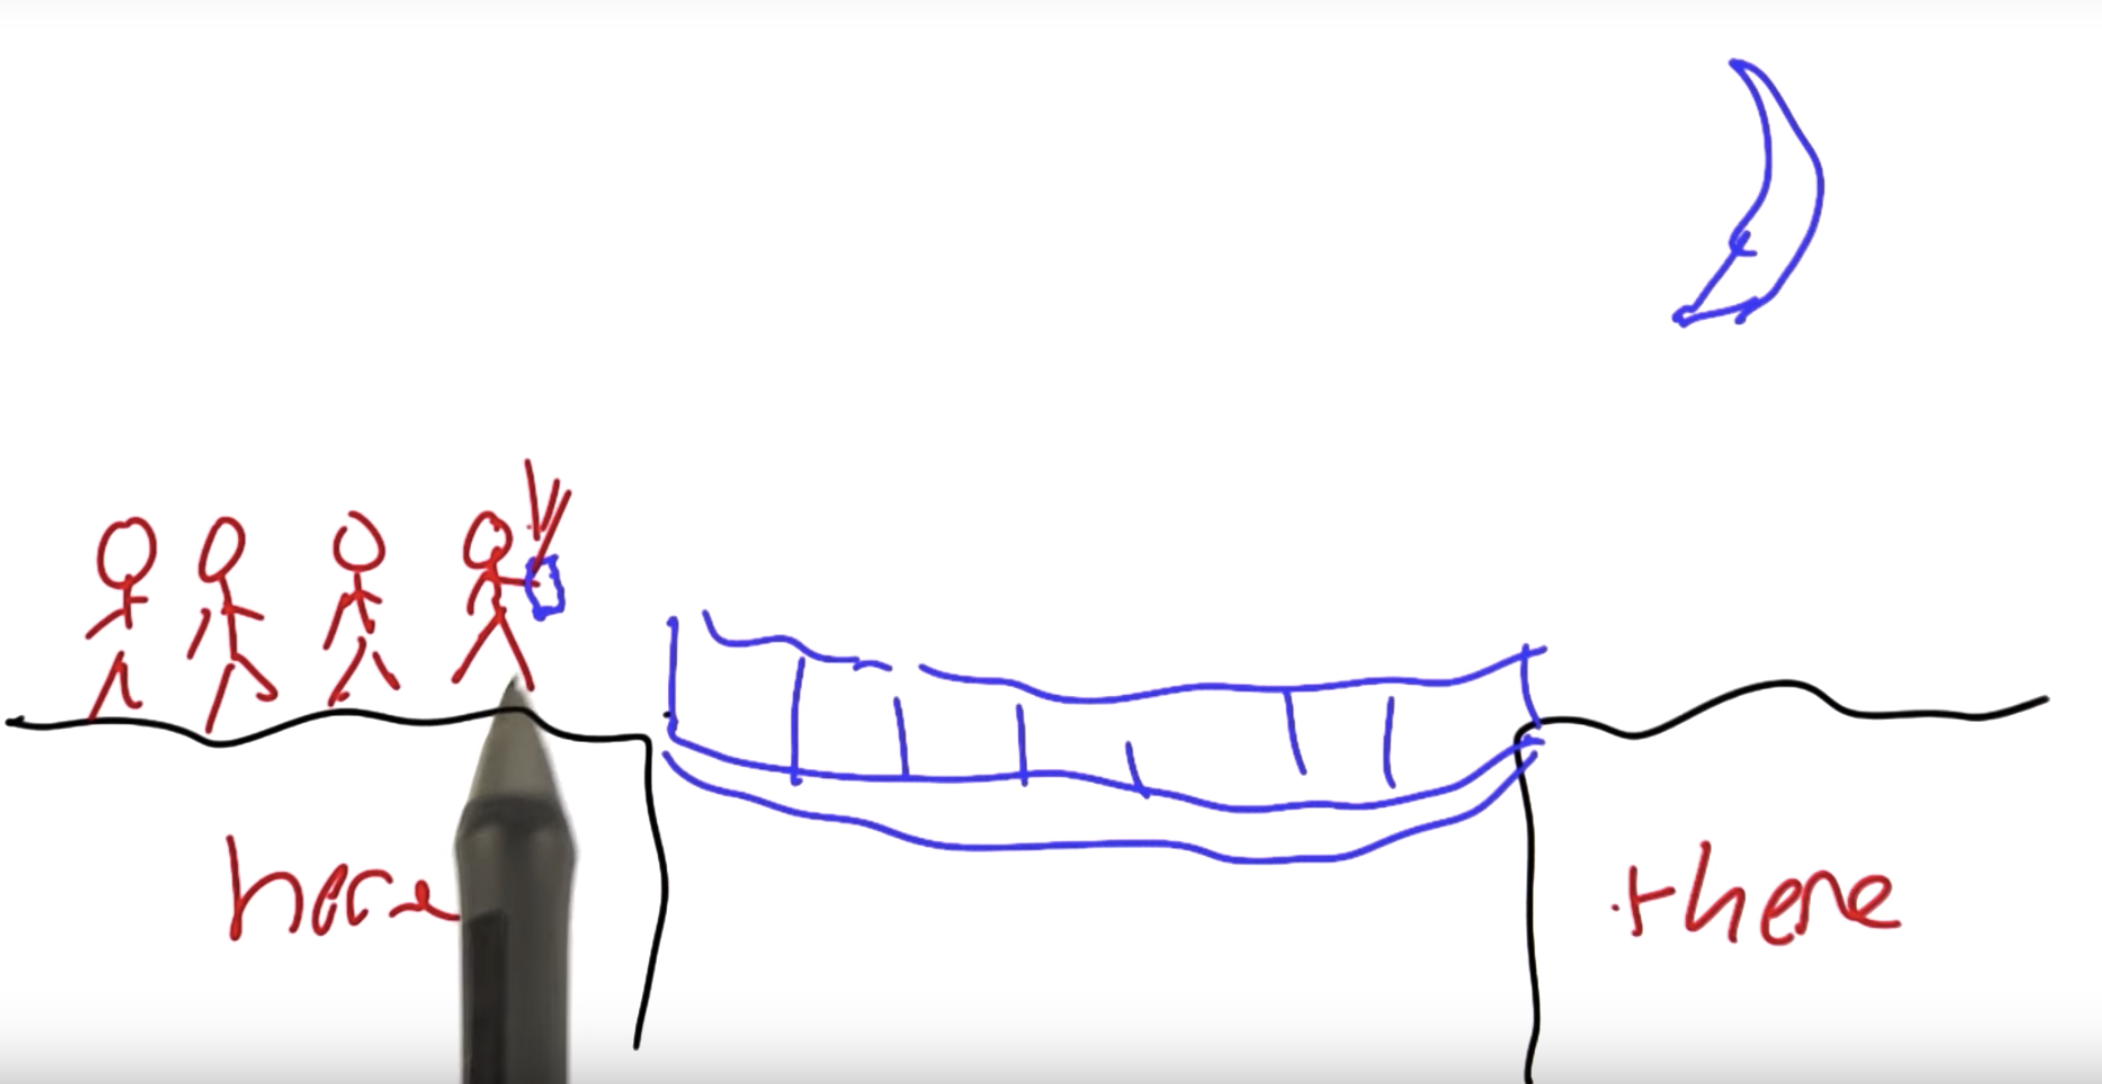

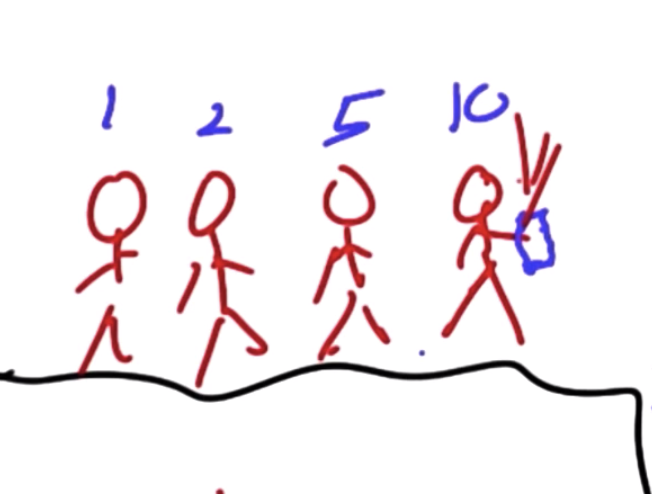

The goal of the problem is to determine which combination of actions will get everyone across the bridge the fastest.

## Concept Inventory

Here's our concept inventory:

* person: each of which has a _different_ speed
* collection of people - on the here side
* collection of people - on the there side
* light
* states
* paths

Now let's choose how to represent each concept:

* person: represent as a number, for example, the third person is represented by the number 5.

We have some choices on representing a collection of people. tuple; list; set and frozenset. Our choice must allow us to manipulate the collection as we solve the problem. It also has to be hashable so we can use the same techniques as above.

All four representations of a collection of people are fine. We can append elements to any of these data structures. For hashability, only the immutable structures, tuples and frozensets, have this property.

## Implementing the Bridge Solution

### Bridge Successors

All our possible representations, we're going to use a tuple to represent the state:

```
(here, there, t)
```

`here` represents everything on the left side of the bridge; `there` represents everthing on the other side; `t` is the total elapsed time since the start.

`here` and `there` will be represented by frozensets, because they are hashable. The picture below shows the various structures when all the people and light are on the `here` side:

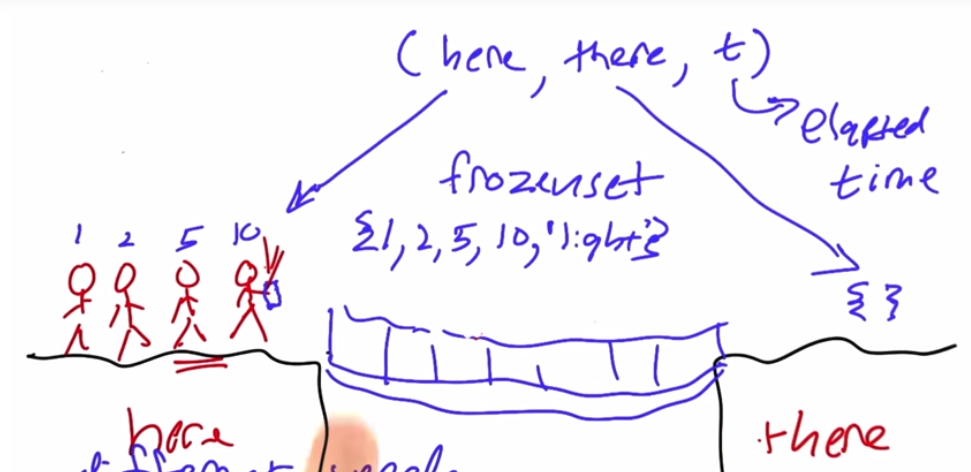

We now need to think about the successors of this state. To start, any of the people can move over to the `there` side, and they must bring the light with them. So at 1-2 people and the light on the `there` side are our possible successor states. There are 10 successor states:

* 1 individuals + light * 4 possible individuals = 4 states
* 2 individuals + light = 6 possible _combinations_ (order doesn't matter) = 6 states

### Implement #bsuccessors

```
# Write a function, bsuccessors(state), that takes a state as input
# and returns a dictionary of {state:action} pairs.
#
# A state is a (here, there, t) tuple, where here and there are 
# frozensets of people (indicated by their times), and potentially
# the 'light,' t is a number indicating the elapsed time.
#
# An action is a tuple (person1, person2, arrow), where arrow is 
# '->' for here to there or '<-' for there to here. When only one 
# person crosses, person2 will be the same as person one, so the
# action (2, 2, '->') means that the person with a travel time of
# 2 crossed from here to there alone.
```

This is the solution that I came up with:

```
import itertools


def bsuccessors(state):
    """Return a dict of {state:action} pairs. A state is a (here, there, t) tuple, where here and there are frozensets of people (indicated by their times)
    and/or the 'light', and t is a number indicating the elapsed time. Action
    is represented as a tuple (person1, person2, arrow), where arrow is '->' for
    here to there and '<-' for there to here."""
    here, there, t = state

    direction_of_travel = '->' if 'light' in here else '<-'

    if direction_of_travel == '->':
        people_who_can_move = [person for person in here if person != 'light']
    else:
        people_who_can_move = [person for person in there if person != 'light']

    combinations_of_travelers = itertools.combinations(people_who_can_move, 1)

    state_action_pairs = {}
    for combination in combinations_of_travelers:
        traveler = combination[0]
        if direction_of_travel == '->':
            there = frozenset((traveler, 'light'))
            here = frozenset(here - there)
        else:
            here = frozenset((traveler, 'light'))
            there = frozenset(there - here)

        elapsed_time = t + traveler
        state_action_pairs[(here, there, elapsed_time)] = (traveler, traveler, direction_of_travel)

    return state_action_pairs
```

and the solution Norvig came up with:

```
def bsuccessors(state):
    """Return a dict of {state:action} pairs. A state is a (here, there, t) tuple, where here and there are frozensets of people (indicated by their times)
    and/or the 'light', and t is a number indicating the elapsed time. Action
    is represented as a tuple (person1, person2, arrow), where arrow is '->' for
    here to there and '<-' for there to here."""
    here, there, t = state

    if 'light' in here:
        return dict(((here - frozenset([a, b, 'light']),
                      there | frozenset([a, b, 'light']),
                      t + max(a, b)),
                     (a, b, '->'))
                    for a in here if a is not 'light'
                    for b in here if b is not 'light')
    else:
        return dict(((here | frozenset([a, b, 'light']),
                      there - frozenset([a, b, 'light']),
                      t + max(a, b)),
                    (a, b, '<-'))
                    for a in there if a is not 'light'
                    for b in there if b is not 'light')
```

In the above solution, we are creating all possible combinations of people combinations, `a` and `b`, that are not lights. Keep in mind this works whether the people collections contain 1 person or 3+ people. The `frozenset` really works well when we have 1 person, in that case `a` and `b` are the same person, but when we create a frozenset with same, ie `frozenset([a, b, 'light'])`, it only consists of a single person since it's a set.

This is a more complicated solution than we expected, primarily because the light is combined with the people in the state, forcing us to check for the light. We should probably have the light as a separate part of the state in retrospect. Thus, a better representation of the state is:

* `here`: tuple of people
* `there`: tuple of people
* `t`: elapsed time
* location of flashlight

Regardless, we're going to continue with our original solution.

Note how we're constantly rethinking our implementation and representation of concepts. It's okay to do this if it's contained within a function. It wouldn't be so good if these adjustments occurred on things that crossed barriers.

### Determine the states and actions in a path

In this exercise, we want to write two functions that, given a path, returns:

* The states in the path
* The actions in the path

My solution:

```
# Write two functions, path_states and path_actions. Each of these
# functions should take a path as input. Remember that a path is a 
# list of [state, action, state, action, ... ]
# 
# path_states should return a list of the states. in a path, and 
# path_actions should return a list of the actions.

def test_path_states():
    assert path_states(testpath) == [(frozenset([1, 10]), frozenset(['light', 2, 5]), 5), # state 1
                (frozenset([10, 5]), frozenset([1, 2, 'light']), 2), # state 2
                (frozenset([1, 2, 10]), frozenset(['light', 5]), 5),
                (frozenset([1, 2]), frozenset(['light', 10, 5]), 10),
                (frozenset([1, 10, 5]), frozenset(['light', 2]), 2),
                (frozenset([2, 5]), frozenset([1, 10, 'light']), 10),
                (frozenset([1, 2, 5]), frozenset(['light', 10]), 10),
                (frozenset([1, 5]), frozenset(['light', 2, 10]), 10),
                (frozenset([2, 10]), frozenset([1, 5, 'light']), 5),
                (frozenset([2, 10, 5]), frozenset([1, 'light']), 1)]


def test_path_actions():
    assert path_actions(testpath) == [(5, 2, '->'), # action 1
                                      (2, 1, '->'), # action 2
                                      (5, 5, '->'),
                                      (5, 10, '->'),
                                      (2, 2, '->'),
                                      (10, 1, '->'),
                                      (10, 10, '->'),
                                      (10, 2, '->'),
                                      (5, 1, '->'),
                                      (1, 1, '->')]

def path_states(path):
    states = []
    for i, element in enumerate(path):
        if i % 2 == 0:
            states.append(element)

    return states


def path_actions(path):
    actions = []
    for i, element in enumerate(path):
        if i % 2 != 0:
            actions.append(element)

    return actions
```

But there's a _far_ easier solution to this using list slicing with the step parameter:

```
def path_states(path):
    "Return a list of states in this path."
    return path[::2]


def path_actions(path):
    "Return a list of actions in this path."
    return path[1::2]
```

### Solution to Bridge Problem

We're now going to walk through the solution to the Bridge problem, step-by-step:

First, the function takes in `here`, which you can pass in as a frozenset, but if you don't the conversion is done for you by the function. The `light` element is also unioned to the `here` set in case you forgot to pass that in.

```
def bridge_problem(here):
    here = frozenset(here) | frozenset(['light'])
```

Next, we define a set that will contain the states we have visited:

```
    explored = set() # set of states we have visited
```

We next define the frontier, which will start off with the `here` state, a frozenset representing the `there` state, and an elapsed time of 0. The frontier is the ordered list of paths we have blazed.

```
    frontier = [ [(here, frozenset(), 0)] ] # ordered list of paths we have blazed
```

Since the goal of the problem is to get everyone from `here` to `there`, we first have to make sure there are actually people on the `here` side. If not, we just return the first path in frontier:

```
    if not here:
        return frozenset[0]
```

Otherwise, we start popping things off the frontier and look at our successors, similar to the first search problem.

```
def bridge_problem(here):
    here = frozenset(here) | frozenset(['light'])
    explored = set() # set of states we have visited
    # State will be a (people-here, people-there, time-elapsed)
    frontier = [ [(here, frozenset(), 0)] ] # ordered list of paths we have blazed
    if not here:
        return frontier[0]
    while frontier:
        path = frontier.pop(0)
        for (state, action) in bsuccessors(path[-1]).items():
            if state not in explored:
                here, there, t = state
                explored.add(state)
                path2 = path + [action, state]
                if not here: # That is, nobody is left here
                    return path2
                else:
                    frontier.append(path2)
                    frontier.sort(key=elapsed_time)

    return []


def elapsed_time(path):
    return path[-1][2]
```

The key difference is the optimal solution is the _shortest_ elapsed time, so we sort the frontier by the elapsed time after adding the path we just searched.

### Improving the solution

This solution gives us a correct path for getting everyone from here to there, but it's not entirely correct. There's actually another path that has a shorter elapsed time.

Let's see why it's not correct.

The way the algorithm works is we have our start state and we start expanding out, this defines our frontier (outlined in green below). We then sort the elements on the frontier by shortest elapsed time (cost). 

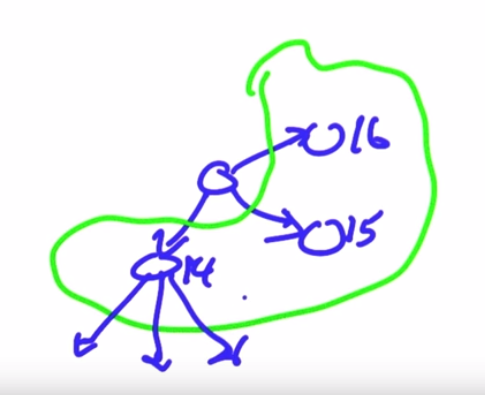

We then pull off the best path, the one with the least cost, expanding out from there.

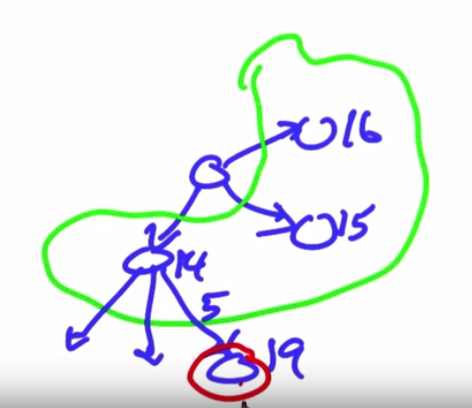

The issue is that we expand from this element, and say there's three possible paths. If the first path we explore reaches our goal, we stop there, even though the other 2 elements we _could_ have explored may be shorter. This is the correct approach if our search goal is the least number of **steps**, but not for a goal of least **cost**.

For example, the path with cost 15 could have an ultimately lower cost path to the same goal, but we'll never explore this.

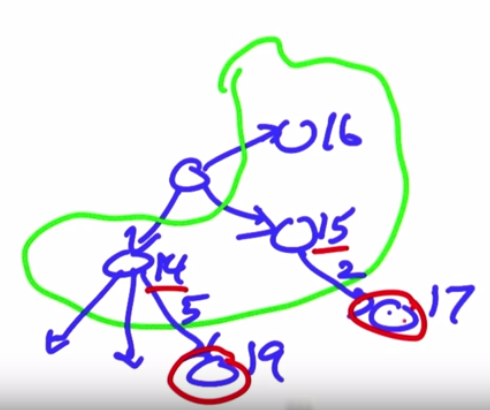

So we're assuming the fastest solution is the one with the fastest incremental paths each step of the way, when in reality it's not.

So how can we correct the solution? Here's three possibilities:

1. Exhaust the frontier
2. Give each node on the frontier _one_ more step
3. Test whether the goal is met _after_ we add it to the frontier

Possibility 1 is not correct. The frontier may be infinite and we'll never get to a solution. Possibility 2 is also not correct. It may take one extra step to see that it's lower cost, but it may just as well take two extra steps. The test later solution will work. The reason it does is we've guaranteed that everyone on the frontier is sorted, and we're pulling off the shortest one first. If we put it back on the frontier instead of realizing immediately that it reached the goal, this will allow us to in turn pull them off the frontier is order of increasing cost. Then we know that the first one we pull off the frontier that meets our goal is the cheapest path to the goal.

The change to implement this is pretty easy. We simply check to see if the goal is met _after_ the previous path has been added to the frontier and sorted by elasped time.

```
def bridge_problem(here):
    here = frozenset(here) | frozenset(['light'])
    explored = set() # set of states we have visited
    # State will be a (people-here, people-there, time-elapsed)
    frontier = [ [(here, frozenset(), 0)] ] # ordered list of paths we have blazed
    if not here:
        return frontier[0]
    while frontier:
        path = frontier.pop(0)
        
        # Check to see if the goal has been met after we pull the cheapest path
        here1, there1, t1 = state1 = path[-1]
        if not here1 or there1 == set(['light']):
            return path
            
        for (state, action) in bsuccessors(path[-1]).items():
            if state not in explored:
                here, there, t = state
                explored.add(state)
                path2 = path + [action, state]
                frontier.append(path2)
                frontier.sort(key=elapsed_time)

    return []
```

### Adding additional tests

This problem is tricky, and we need to test the various cases. We're going to use doctest once again:

```
class TestBridge: """
>>> elapsed_time(bridge_problem([1,2,5,10]))
17

## There are two equally good solutions
>>> S1 = [(2, 1, '->'), (1, 1, '<-'), (5, 10, '->'), (2, 2, '<-'), (2, 1, '->')]
>>> S2 = [(2, 1, '->'), (2, 2, '<-'), (5, 10, '->'), (1, 1, '<-'), (2, 1, '->')]
>>> path_actions(bridge_problem([1,2,5,10])) in (S1, S2)
True

## Try some other problems
>>> path_actions(bridge_problem([1,2,5,10,15,20]))
[(2, 1, '->'), (1, 1, '<-'), (10, 5, '->'), (2, 2, '<-'), (2, 1, '->'), (1, 1, '<-'), (15, 20, '->'), (2, 2, '<-'), (2, 1, '->')]
>>> path_states(bridge_problem([1,2,5,10,15,20]))
[(frozenset([1, 2, 20, 5, 'light', 10, 15]), frozenset([]), 0), (frozenset([10, 20, 5, 15]), frozenset([1, 2, 'light']), 2), (frozenset([1, 20, 5, 'light', 10, 15]), frozenset([2]), 3), (frozenset([1, 20, 15]), frozenset(['light', 2, 10, 5]), 13), (frozenset([1, 2, 'light', 20, 15]), frozenset([10, 5]), 15), (frozenset([20, 15]), frozenset([1, 10, 2, 5, 'light']), 17), (frozenset([1, 'light', 20, 15]), frozenset([10, 2, 5]), 18), (frozenset([1]), frozenset([2, 20, 5, 'light', 10, 15]), 38), (frozenset([1, 2, 'light']), frozenset([10, 20, 5, 15]), 40), (frozenset([]), frozenset([1, 2, 20, 5, 'light', 10, 15]), 42)]

>>> path_actions(bridge_problem([1,2,4,8,16,32]))
[(2, 1, '->'), (1, 1, '<-'), (8, 4, '->'), (2, 2, '<-'), (1, 2, '->'), (1, 1, '<-'), (16, 32, '->'), (2, 2, '<-'), (2, 1, '->')]
>>> path_states(bridge_problem([1,2,4,8,16,32]))
[(frozenset([32, 1, 2, 4, 16, 8, 'light']), frozenset([]), 0), (frozenset([32, 16, 4, 8]), frozenset([1, 2, 'light']), 2), (frozenset([32, 16, 4, 1, 8, 'light']), frozenset([2]), 3), (frozenset([32, 16, 1]), frozenset([8, 'light', 2, 4]), 11), (frozenset([32, 16, 2, 'light', 1]), frozenset([8, 4]), 13), (frozenset([32, 16]), frozenset([8, 1, 2, 4, 'light']), 15), (frozenset([32, 16, 'light', 1]), frozenset([8, 2, 4]), 16), (frozenset([1]), frozenset([32, 16, 2, 4, 8, 'light']), 48), (frozenset([1, 2, 'light']), frozenset([32, 16, 4, 8]), 50), (frozenset([]), frozenset([32, 16, 2, 4, 1, 8, 'light']), 52)]
"""

if __name__ == "__main__":
    import doctest
    doctest.testmod()
```

### Refactoring the Bridge Problem

Let's consider two characteristics of our program: correctness and efficiency. We're doing well on correcness, but not so well on efficiency.

Let's dive into the issues:

We're representing states by: `(here, there, t)`. But we can have two states with identical `here` and `there` values, only differing by `t`. Why is this a problem? 

Suppose we had two people, one with a time of 1 and the other with a time of 1000:

```
bridge_problem([1, 1000])
```

Since we choose the cheapest cost path at each stage, we'll actually have the `1` go back and forth a thousand times, which means 1,000 states will be generated. In the diagram below, each circle is a new state, and you'll notice the `1` going back and forth between `here` and `there` and the 1000, indicated with a `K`, staying on the `here` side.

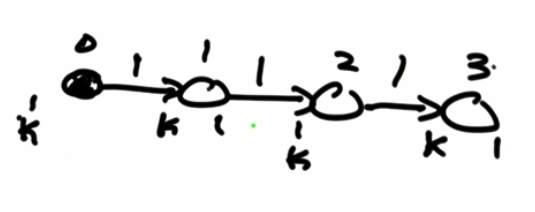

Our program thinks we're getting different states, but we're just getting the same states over and over. We're going around in circles.

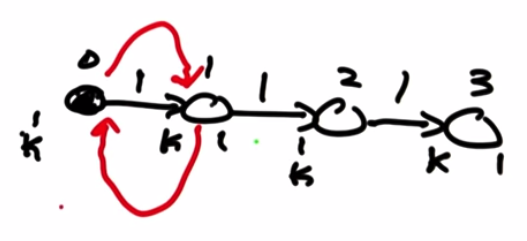


To recognize that these iterations are in fact the same states, we can't consider `t` as part of the state and need to remove it from our state and deal with it somewhere else. Thus, the representation of our state will be:

```
state = (here, there)
```

One way of doing this is adjusting how we represent the path. Right now, our path is represented as:

```
path: [state, action, state, action...]
```

We can move the total elapsed time into a tuple with the action:

```
path: [state, (action, total_time), ...]
```

### Adjusting bsuccessors to handle the state and path representations

We will first update `bsuccessors` to handle these new representations:

```
# write a function, bsuccessors2 that takes a state as input
# and returns a dictionary of {state:action} pairs.
# 
# The new representation for a path should be a list of 
# [state, (action, total time), state, ... , ], though this 
# function will just return {state:action} pairs and will
# ignore total time.

def bsuccessors2(state):
    """Return a dict of {state:action} pairs. A state is a
    (here, there) tuple, where here and there are frozensets
    of people (indicated by their travel times) and/or the light."""
    here, there = state

    if 'light' in here:
        return dict(((here - frozenset([a, b, 'light']),
                      there | frozenset([a, b, 'light'])),
                      (a, b, '->'))
                     for a in here if a is not 'light'
                     for b in here if b is not 'light')
    else:
        return dict(((here | frozenset([a, b, 'light']),
                      there - frozenset([a, b, 'light'])),
                      (a, b, '<-'))
                     for a in there if a is not 'light'
                     for b in there if b is not 'light')
```

It's pretty straight-forward. We're just dropping `t` in the original implementation of `bsuccessors`.

### Dealing with elasped time

Since we removed the elasped time from the state, we need to move it somewhere else. But instead of referring to times, we're going to generalize and talk about the cost of a path. We need to define two functions:

* Calculate the total cost of a path
* Calculate the cost of an action in the bridge problem

Remember that we're now representing paths as: `path = (state, (action, total_cost), state, ... )`

Let's first calculate the cost of a path with a new function: `path_cost`:

```
def path_cost(path):
    """
    The total cost of a path (which is stored in a tuple
    with the final action.

    path = (state, (action, total_cost), state, ... )
    """
       if len(path) < 3: # we don't have an action, just an individual state

        return 0
    else:
        action, total_cost = path[-2]
        return total_cost

        
def test_path_cost():
    assert path_cost(('fake_state1', ((2, 5, '->'), 5), 'fake_state2')) == 5
    assert path_cost(('fs1', ((2, 1, '->'), 2), 'fs2', ((3, 4, '<-'), 6), 'fs3')) == 6
```

And then determine the cost of an action with another new function: `bcost`:

```
def bcost(action):
    """Returns the cost (a number) of an action in the bridge problem."""
    a, b, arrow = action
    return max(a, b)

def test_bcost():
    assert bcost((4, 2, '->'),) == 4
    assert bcost((3, 10, '<-'),) == 10
```

### Putting it all together

Now, let's update our bridge problem solution with our refactored representations. Here's the solution in its entirety:

```
def bridge_problem2(here):
    here = frozenset(here) | frozenset(['light'])
    explored = set() # set of states we have visited
    # State will be a (people-here, people-there) tuple
    # e.g. ({1, 2, 5, 10, 'light'}, {})
    frontier = [ [(here, frozenset())] ] # ordered list of paths we have blazed
    while frontier:
        path = frontier.pop(0)
        here1, there1 = state1 = final_state(path)
        if not here1 or (len(here1) == 1 and 'light' in here1):
            return path
        explored.add(state1)
        pcost = path_cost(path)
        for (state, action) in bsuccessors2(state1).items():
            if state not in explored:
                total_cost = pcost + bcost(action)
                path2 = path + [(action, total_cost), state]
                add_to_frontier(frontier, path2)
    return Fail
```

We're doing much the same as before. We're popping off a path from our frontier:

```
path = frontier.pop(0)
```

We're checking to see if we've reached our goal:

```
if not here1 or (len(here1) == 1 and 'light' in here1):
    return path
```

Keeping track of states we've already explored:

```
explored.add(state1)
```

Next is the first new thing. We're calculating the cost of the path that we just popped off:

```
pcost = path_cost(path)
```

Then for each of the successors, we figure out the total cost, which is the cost of the path so far plus the individual action we'd next take. We then create the new path with our refactored representation:

```
for (state, action) in bsuccessors2(state1).items():
    if state not in explored:
        total_cost = pcost + bcost(action)
        path2 = path + [(action, total_cost), state]
        add_to_frontier(frontier, path2)
```

We also created a small function to determine the final state:

```
def final_state(path): return path[-1]
```

As well as a new function to add to the frontier:

```
def add_to_frontier(frontier, path):
    "Add path to frontier, replacing costlier path if there is one."
    # (This could be done more efficiently.)
    # Find if there is an old path to the final state of this path.
    old = None
    for i,p in enumerate(frontier):
        if final_state(p) == final_state(path):
            old = i
            break
    if old is not None and path_cost(frontier[old]) < path_cost(path):
        return # Old path was better; do nothing
    elif old is not None:
        del frontier[old] # Old path was worse; delete it
    # Now add the new path and resort
    frontier.append(path)
```

For adding to the frontier, we could just throw it on the end as we did before, but there's a tricky part here. There may be two different paths that end up in the same state. If that's the case, we want to choose the best one. We don't want to get to that state through the more expensive path.

This piece of code is determining if there's another path to the final state:

```
for i,p in enumerate(frontier):
    if final_state(p) == final_state(path):
        old = i
        break
```

And if there is, we see which one is least costly:

```
if old is not None and path_cost(frontier[old]) < path_cost(path):
    return # Old path was better; do nothing
elif old is not None:
    del frontier[old] # Old path was worse; delete it
```

### Conclusions

This problem was tricky. There's a lot of cases to deal with to get this search just right. To avoid mistakes, we can use the following tools:

* Write lots of tests!
* Use (and re-use) tools!

Everytime we need to search, we don't want to write this search routine from scratch. We want to write it once (or have someone else write it once), and then reuse it. But in order to do this, we need to **Generalize**. The solution we have is only useful for the bridge problem. But we want a search routine that can be used in a wide variety of problems.




# Generalizing

This problem will illustrate how to do a generalization. Since we generalize over problems, we need another problem. But instead of a problem searching for the _lowest cost_ path, let's just do one that finds the _shortest path_-- the least number of steps to a solution.


## Missionaries and Cannibals Problem

There's a river we have to cross, and we have a boat. On one side of the river is the boat and six people. Three are missionaries and three are cannibals.

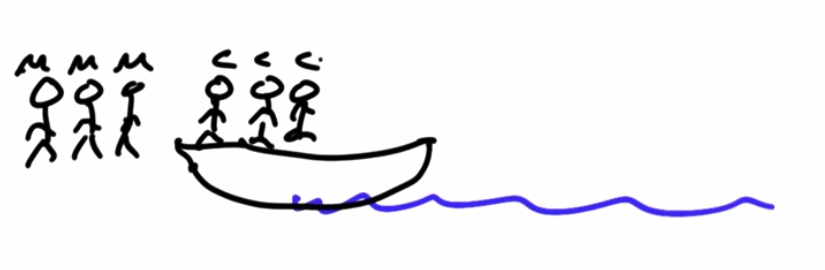

The goal is to get everyone on the other side. There's some rules that complicate it:

* 1-2 people can cross the river in the boat.
* We don't want the cannibals eating the missionaries. Thus, there can't ever be more cannibals than missionaries on either side of the river at the same time. So we must shuttle them back and forth in a way that this situation never occurs.

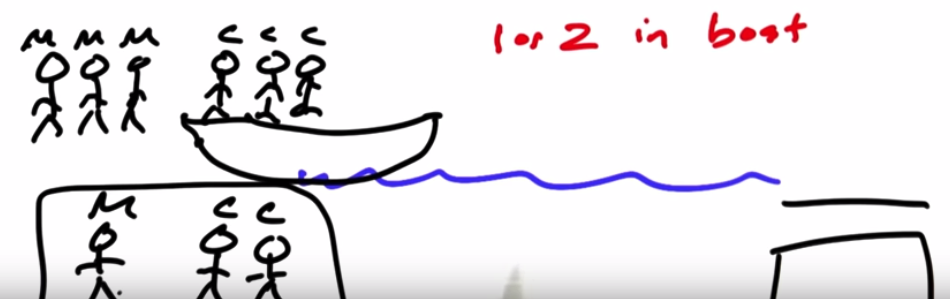


### Representing the State

Here are three possibilities for representing the state:

* `(set(M), set(C), B)`: represents the missionaries and cannibals on the left side of the river, plus a Boolean whether the boat is on left side of the river. We can in turn know what's on the other side with this representation.
* `(M, C, B)`: integers representing the missionaries, cannibals and boat on one side of the river.
* `(M1, C1, B1, M2, C2, B2)`: integers representing the missionaries, cannibals and boat on both sides of the river.

All of these representations would actually work. Each one has everything you need to know to solve this problem.

But now, _what's the best representation for generalizing the problem to any number of missionaries, cannibals and boats on both sides of the river?_

Only the last representation works for this case. We need both sets of numbers since we don't know how many _total_ items are on both sides combined. The other two representations rely on the fact that you know there's 3 total missionaries and cannibals and 1 boat, and use the difference to infer the number of the other side.

So this six element tuple is best: `(M1, C1, B1, M2, C2, B2)`

### Writing the successors function

Now, we'll implement the `successors` function to determine the successors to a given state.

```
# Write a function, csuccessors, that takes a state (as defined below) 
# as input and returns a dictionary of {state:action} pairs. 
#
# A state is a tuple with six entries: (M1, C1, B1, M2, C2, B2), where 
# M1 means 'number of missionaries on the left side.'
#
# An action is one of the following ten strings: 
#
# 'MM->', 'MC->', 'CC->', 'M->', 'C->', '<-MM', '<-MC', '<-M', '<-C', '<-CC'
# where 'MM->' means two missionaries travel to the right side.
# 
# We should generate successor states that include more cannibals than
# missionaries, but such a state should generate no successors.
```

Here's my solution:

```
def csuccessors(state):
    """Find successors (including those that result in dining) to this
    state. But a state where the cannibals can dine has no successors."""
    M1, C1, B1, M2, C2, B2 = state

    # Check if cannibals can dine in the current state -> no successors
    # Also check that there's at least one missionary
    if C1 > M1 > 0 or C2 > M2 > 0:
        return {}

    actions = {'C': (0, 1), 'M': (1, 0), 'MC': (1, 1), 'CC': (0, 2), 'MM': (2, 0)}

    successor_states = {}
    # If boat on left-hand side, we need to move people over to the right
    if B1:
        for action, (M, C) in actions.items():
            if M1-M >= 0 and C1-C >= 0:
                successor_state = (M1-M, C1-C, 0, M2+M, C2+C, 1)
                successor_states[successor_state] = action+'->'
    # If boat on right-hand side, we need to move people over to the left
    else:
        for action, (M, C) in actions.items():
            if M2-M >= 0 and C2-C >= 0:
                successor_state = (M1+M, C1+C, 1, M2-M, C2-C, 0)
                successor_states[successor_state] = '<-'+action

    return successor_states
```

And here's Norvig's solution. The key thing is his concept of deltas between two states that corresponds to the possible moves:

```
deltas = {
    (2, 0, 1,     -2, 0, -1): 'MM',
    (0, 2, 1,     0, -2, -1): 'CC',
    (1, 1, 1,    -1, -1, -1): 'MC',
    (1, 0, 1,    -1, 0, -1):  'M',
    (0, 1, 1,    0, -1, -1):  'C',
}
```

For example, `(2, 0, 1,     -2, 0, -1): 'MM',` means the `MM` subtracts two `M`s and subtracts one `B`.

We then make sure if there's more cannibals than mercenaries on either side _and_ that there's at least one M:

```
if C1 > M1 > 0 or C2 > M2 > 0:
    return {}
```

Finally, we collect our items corresponding to the various actions:

```
    items = []
    if B1 > 0:
        items += [(sub(state, delta), a+'->') for delta, a in deltas.items()]

    if B2 > 0:
        items += [(add(state, delta), '<-'+a) for delta, a in deltas.items()]

    return dict(items)
```

Making use of two functions we defined for vector arithmetic:

```
def add(X, Y):
    "Add two vectors, X and Y."
    return tuple(x+y for x,y in zip(X, Y))


def sub(X, Y):
    "Subtract vector Y from X."
    return tuple(x-y for x,y in zip(X, Y))
```

`zip` returns elements as vectors:

```
[(2, 2), (2, 0), (1, 1), (0, -2), (0, 0), (0, -1)]
```

which we then add or subtract from each other to reduce to a tuple of the successor state.

Norvig's final solution:

```
def csuccessors(state):
    """Find successors (including those that result in dining) to this
    state. But a state where the cannibals can dine has no successors."""
    M1, C1, B1, M2, C2, B2 = state

    # Check if cannibals can dine in the current state -> no successors
    # Also check that there's at least one missionary
    if C1 > M1 > 0 or C2 > M2 > 0:
        return {}

    items = []
    if B1 > 0:
        items += [(sub(state, delta), a+'->') for delta, a in deltas.items()]

    if B2 > 0:
        items += [(add(state, delta), '<-'+a) for delta, a in deltas.items()]

    return dict(items)


deltas = {
    (2, 0, 1,     -2, 0, -1): 'MM',
    (0, 2, 1,     0, -2, -1): 'CC',
    (1, 1, 1,    -1, -1, -1): 'MC',
    (1, 0, 1,    -1, 0, -1):  'M',
    (0, 1, 1,    0, -1, -1):  'C',
}


def add(X, Y):
    "Add two vectors, X and Y."
    return tuple(x+y for x,y in zip(X, Y))


def sub(X, Y):
    "Subtract vector Y from X."
    return tuple(x-y for x,y in zip(X, Y))
```

And here's the final solution:

```
def csuccessors(state):
    """Find successors (including those that result in dining) to this
    state. But a state where the cannibals can dine has no successors."""
    M1, C1, B1, M2, C2, B2 = state

    # Check if cannibals can dine in the current state -> no successors
    # Also check that there's at least one missionary
    if C1 > M1 > 0 or C2 > M2 > 0:
        return {}

    items = []
    if B1 > 0:
        items += [(sub(state, delta), a+'->') for delta, a in deltas.items()]

    if B2 > 0:
        items += [(add(state, delta), '<-'+a) for delta, a in deltas.items()]

    return dict(items)


deltas = {
    (2, 0, 1,     -2, 0, -1): 'MM',
    (0, 2, 1,     0, -2, -1): 'CC',
    (1, 1, 1,    -1, -1, -1): 'MC',
    (1, 0, 1,    -1, 0, -1):  'M',
    (0, 1, 1,    0, -1, -1):  'C',
}


def add(X, Y):
    "Add two vectors, X and Y."
    return tuple(x+y for x,y in zip(X, Y))


def sub(X, Y):
    "Subtract vector Y from X."
    return tuple(x-y for x,y in zip(X, Y))
```




